
1) Fazer o teste de normalidade. 

2) Testar a estacionariedade.

3) Plotar os dados, a acf e pacf. 

4) Decompor a série. 

5) Escolher o modelo mais adequado, através dos critérios (Ver o meu TCC as fórmulas e os comandos). 

6) Testar a normalidade dos resíduos através de gráficos e testes. 

7) Os coeficientes estimados do modelo escolhido. 

8) Fazer a previsão 6 passos a frente (Ver os comandos no meu TCC). 

9) Comparar os valores reais e os previstos,


In [1]:
install.packages("nortest")
install.packages("tseries")
install.packages("ggplot2")

library(ggplot2)
library(tseries)
library(nortest)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
dados = read.csv("anomes_ob.csv")

In [3]:
dados <- ts(dados[,2])

In [4]:
ts = ts(dados, start=c(2008,10), frequency=12)

### 1) Fazer o teste de normalidade. 


In [5]:
lillie.test(dados)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dados
D = 0.13968, p-value = 6.785e-07


### 2) Testar a estacionariedade.

In [6]:
adf.test(dados, k = 0)

Warning message in adf.test(dados, k = 0):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  dados
Dickey-Fuller = -5.0622, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


### 3) Plotar os dados, a acf e pacf.

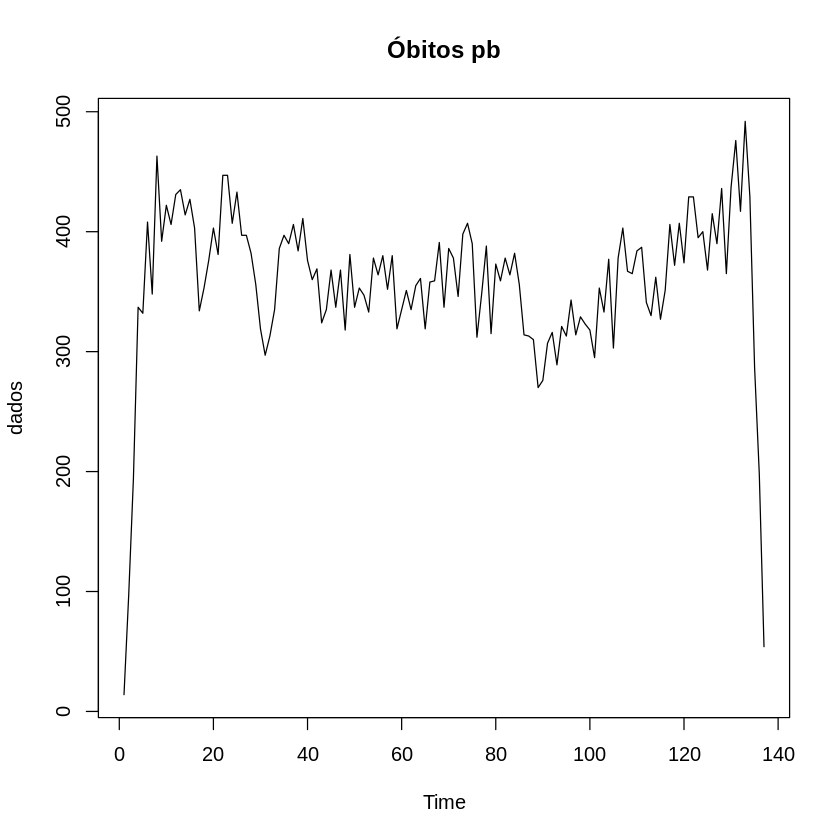

In [7]:
plot.ts(dados,main="Óbitos pb")    

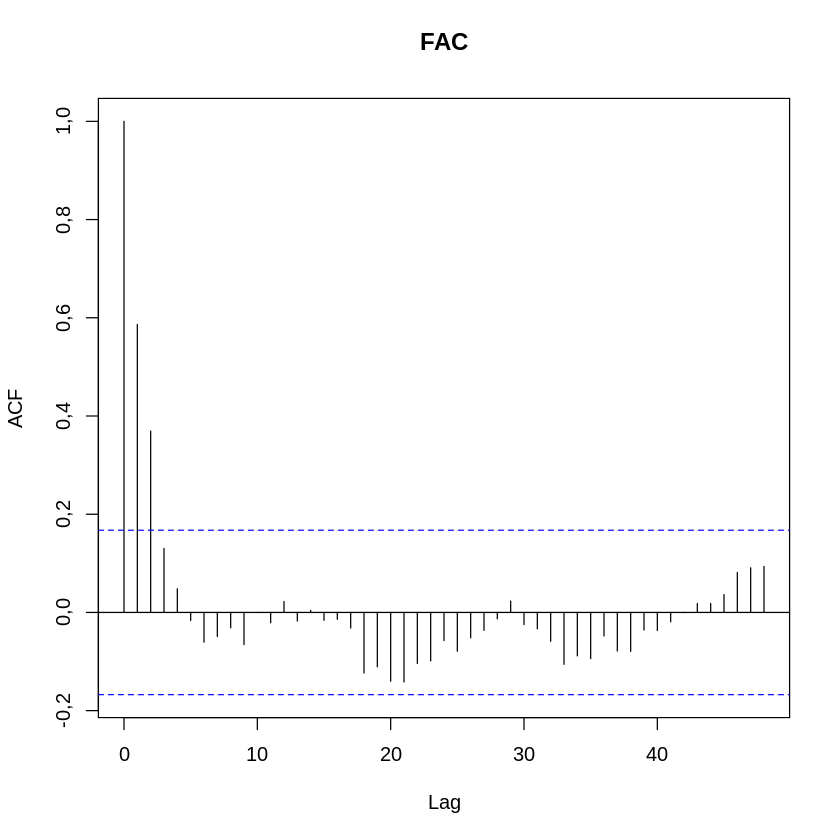

In [8]:
acf(dados,lag=48,main="FAC")

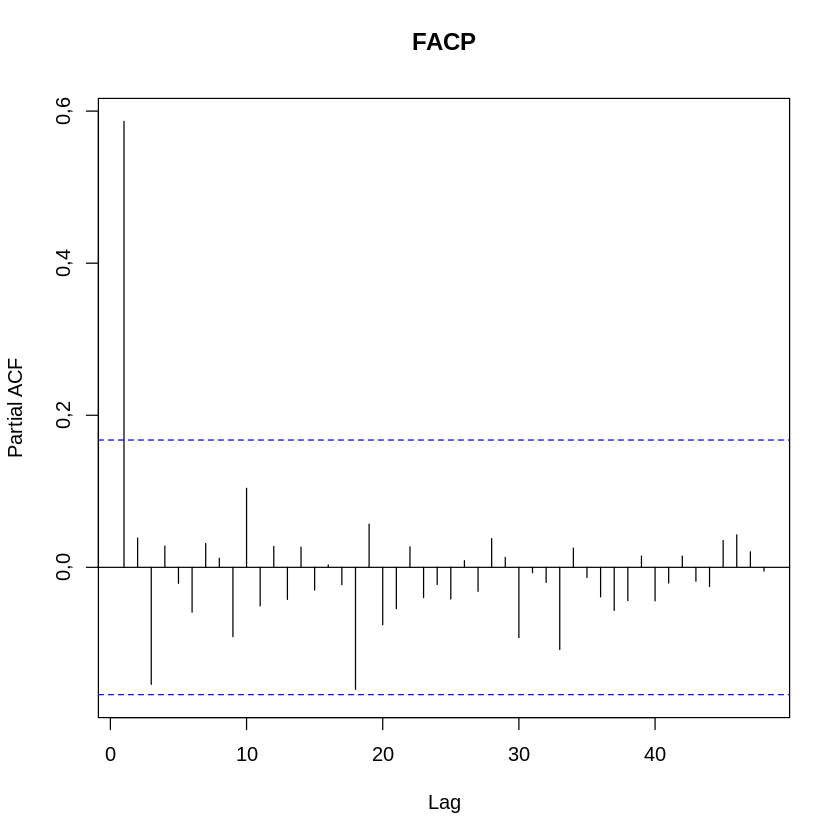

In [9]:
pacf(dados,lag=48,main="FACP")

### 4) Decompor a série.

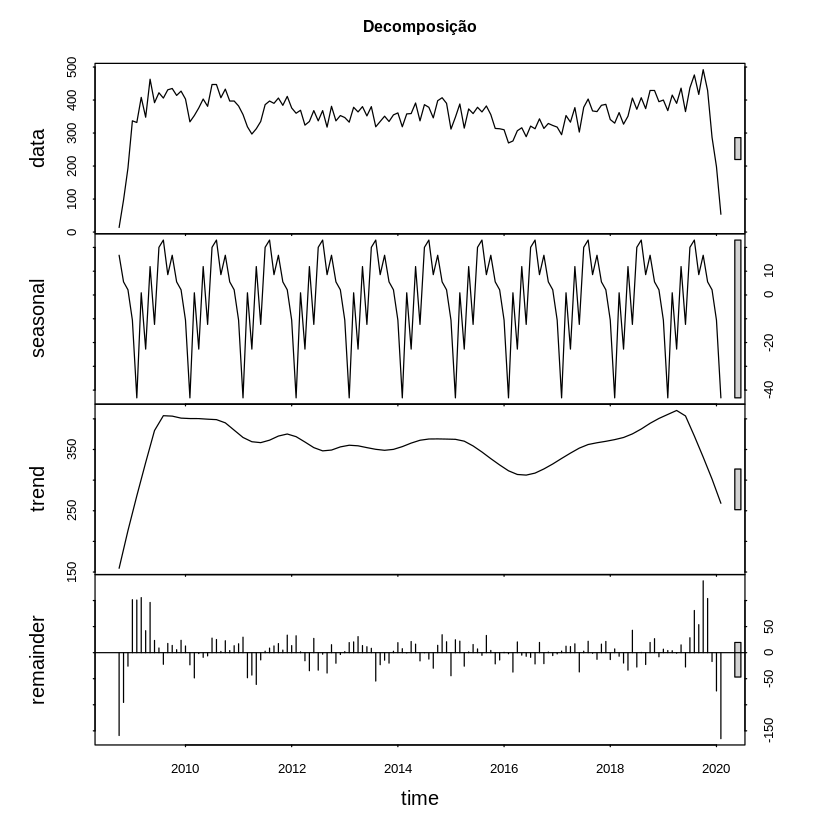

In [10]:
ajuste.stl <- stl(ts, "per")
plot(ajuste.stl, main="Decomposição")

### 5) Escolher o modelo mais adequado, através dos critérios (Ver o meu TCC as fórmulas e os comandos).
### 7) Os coeficientes estimados do modelo escolhido.

In [11]:
ajuste.sarima=arima(dados,order=c(1,0,3))
ajuste.sarima


Call:
arima(x = dados, order = c(1, 0, 3))

Coefficients:
         ar1      ma1     ma2     ma3  intercept
      0,8443  -0,0454  0,4091  0,2158   320,9508
s.e.  0,1053   0,1161  0,0882  0,0939    41,1021

sigma^2 estimated as 1686:  log likelihood = -704,61,  aic = 1421,22

### 8) Fazer a previsão 6 passos a frente (Ver os comandos no meu TCC).
### 9) Comparar os valores reais e os previstos.

In [12]:
d6 = dados[1:66]
d6 = ts(d6, start=c(2008,10), frequency=12)
ajuste.sarima6=arima(d6,order=c(1,0,3))
pacc = predict(ajuste.sarima6, 6)
reais6 <- dados[67:72]
prev6 <- pacc$pred

In [13]:
h=6
C1=sum(reais6)-sum(prev6)
C2=((sum(reais6)-sum(prev6))/sum(reais6))*100
C3=(1/h)*sum((reais6-prev6)^2)
C4=(1/h)*sum(abs(reais6-prev6))

In [14]:
pacc$pred + 1.96*pacc$se
pacc$pred - 1.96*pacc$se

ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. rep

### 6) Testar a normalidade dos resíduos através de gráficos e testes.

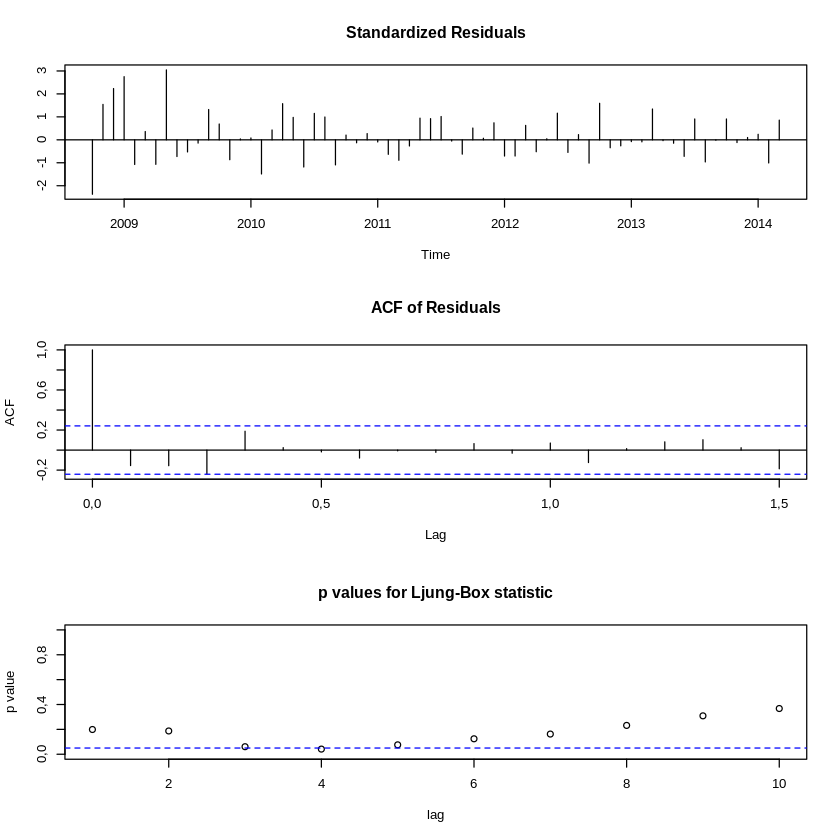

In [15]:
tsdiag(ajuste.sarima6)

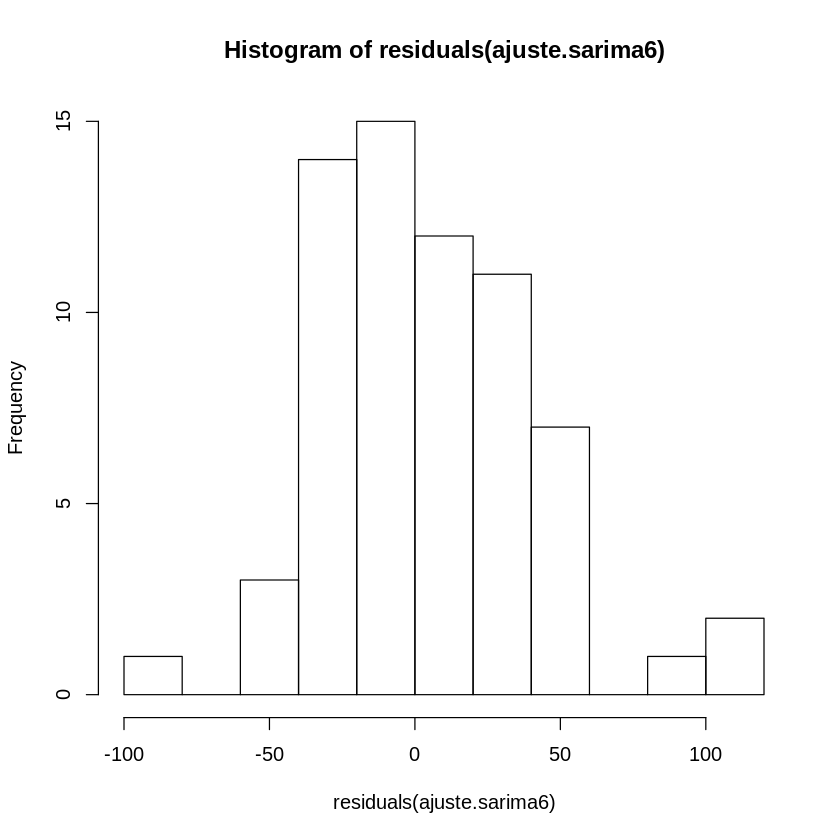

In [16]:
hist(residuals(ajuste.sarima6))

In [17]:
qqplot(residuals(ajuste.sarima))

#A QQ graph compares the quantiles of two distributions,
# therefore, the qqplot function requires two arguments.
#If you want to compare your sample's quantiles with those of a
# theoretical normal distribution, use the qqnorm function.

ERROR: Error in sort(y): argumento "y" ausente, sem padrão


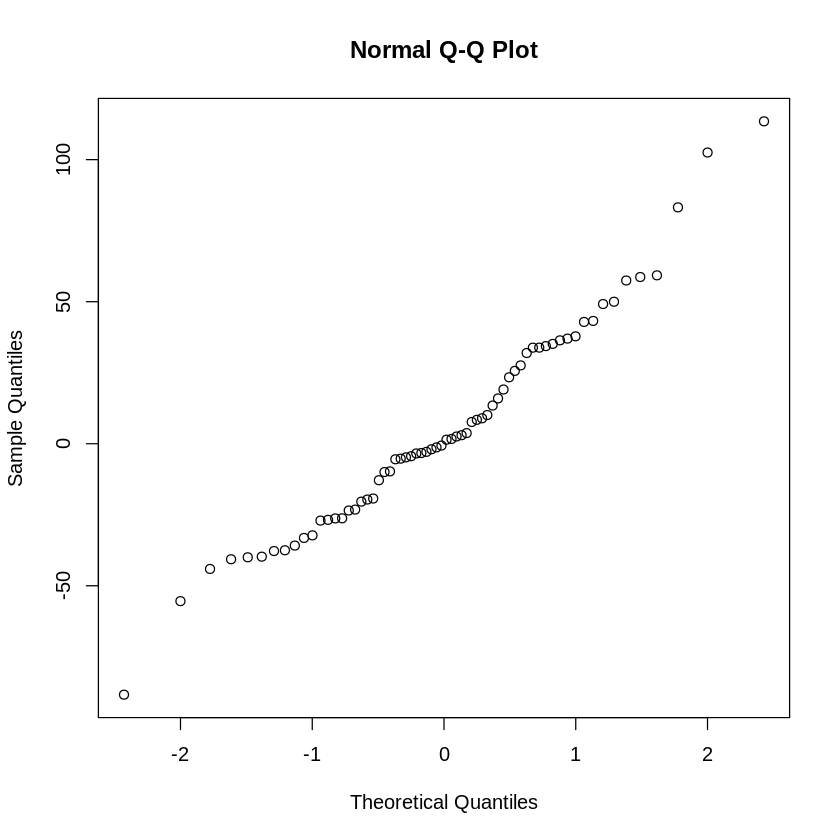

In [18]:
qqnorm(residuals(ajuste.sarima6))

In [19]:
lillie.test(residuals(ajuste.sarima6))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(ajuste.sarima6)
D = 0,092494, p-value = 0,1741
